## Random Forest

A **Random Forest** is made up of multiple **Decision Trees**

#### Decision Tree

A **Decision Tree** asks a series of yes/no questions on available to predict the class or continuous value (for regression)

In the **CART ALgorithm**, a decision tree is built by determining the questions that lead to the *greatest reduction in* **Gini Impurity**

#### Gini Impurity

The **Gini Impurity** of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of sample in the node

The Gini Impurity of node $n$ is:

$I_G(n) = 1 - \sum_{i=1}^J{(p_i)^2}$, where $J$ = Number of classes, and $p_i$ is the fraction of examples in class $i$

In [4]:
import numpy as np
import pandas as pd

# Set random seed
RSEED = 50

In [5]:
# Dataset
X = np.array([[2, 2], [2, 1], [2, 3], [1, 2], [1, 1], [3, 3]])
y = np.array([0, 1, 1, 1, 0, 1])

### Visualize Data

Text(0.5, 1.0, 'Data')

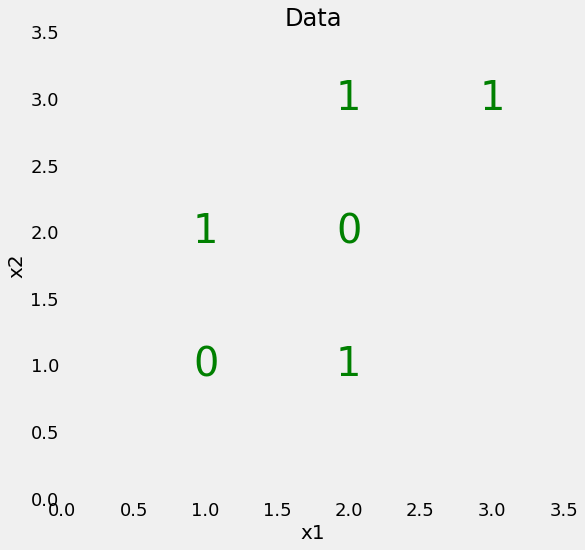

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize=(8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize=40, color='g', ha='center', va='center')
    
plt.grid(None)
plt.xlim((0, 3.5))
plt.ylim((0, 3.5))
plt.xlabel('x1', size=20)
plt.ylabel('x2', size=20)
plt.title('Data', size=24)

### Single Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree
tree = DecisionTreeClassifier(max_depth=2, random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [8]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Model Accuracy: {tree.score(X,y)}')

Decision tree has 5 nodes with maximum depth 2.
Model Accuracy: 0.6666666666666666


### Visualize Decision Tree

In [10]:
from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded=True, feature_names=['x1', 'x2'], class_names=['0', '1'], filled=True)

In [11]:
from subprocess import call

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400'])

0

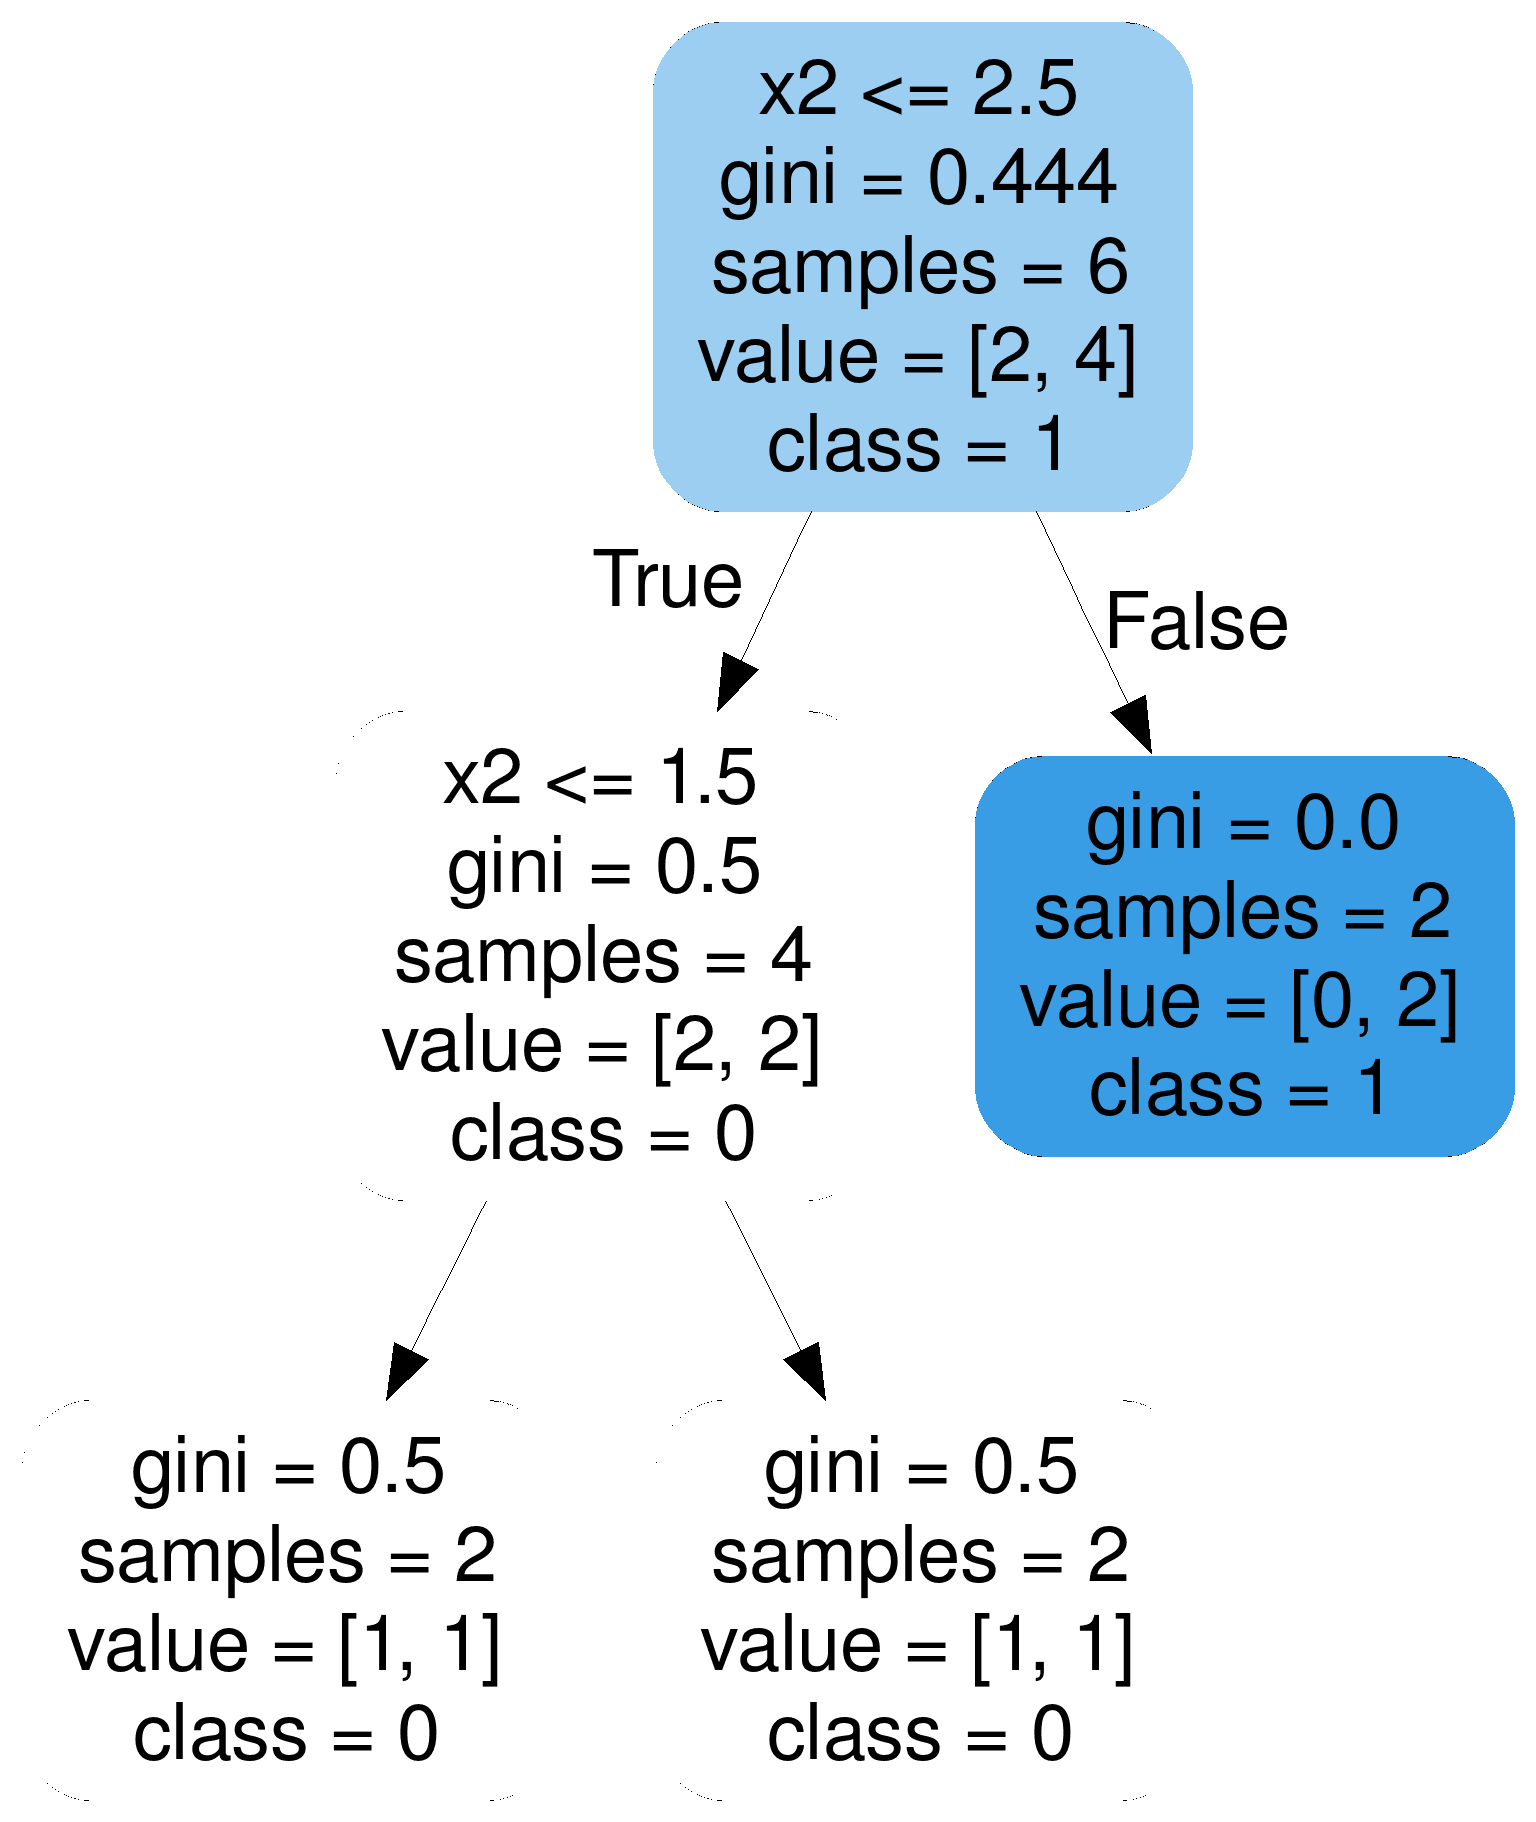

In [12]:
from IPython.display import Image
Image('tree.png')

### Gini Impurity (cont.)

The Gini impurity represents the probability that a randomly selected sample from the node will be incorrectly classified according to the distribution of samples in the node. At the top node, there is a 44.4% that a random point would be incorrectly classified.

At the bottom, the Gini Impurity drops to 0%, but that can mean there is **Overfitting**. This can be resolved by limiting the **max depth**.

#### Overfitting

**Overfitting** is when a flexible model is fit too closely to the training data. A **flexible** model can have a **high variance** because the learned parameters vary considerably based on the training data

An **inflexible** model has a high **bias** because it makes assumptions about the training data.

Find the right balance of model flexibility by adjusting the **maximum depth**

### Random Forest

The **Random forest** is made up of many decision trees. Rather than averaging the prediction of trees (which would just be *forest*), **Random forest** uses two key concepts:

1. Random sampling of training data points when building trees

2. Random subsets of features considered when splitting nodes

#### Random sampling of training  observations